# `denmarf`: a Python package for density estimation using masked autoregressive flow

<img src="https://user-images.githubusercontent.com/55488840/219470588-de21e355-2e45-4bfc-913c-37d7c625951e.png" alt="app-screen" width="500" />

*Example 1: fitting a 2D Gaussian distribution*

This is surely an overkill to use masked autoregressive flow (MAF) to fit a 2D Gaussian distribution where we know how to evaluate its probability density function exactly and generate samples efficiently from the distribution. Therefore this notebook is really just an example to show how to use `denmarf`, and allows us to compare `denmarf` result with the exact result.

In [1]:
# Run this cell once if denmarf is not installed already
!pip install getdist denmarf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries

import numpy as np
from scipy.stats import multivariate_normal
from denmarf import DensityEstimate

# Plotting
import matplotlib
from matplotlib import pyplot as plt
import getdist
from getdist import MCSamples, plots
%matplotlib inline
%config InlineBackend.figure_format="retina"

### Using `denmarf` to train a model

**NOTE**: if you are running this notebook on Google colab, you can use the GPU accleration by changing the runtime type. Go to Runtime -> Change runtime type. Select GPU and then restart the session.

In [3]:
# Initialize a 2D Gaussian with certain mean and covariance matrix
gaussian_dist = multivariate_normal([3.5, -1.2], [[2.0, 0.3], [0.3, 0.5]])

# Generate some samples from the 2D Gaussian distribution
xgen = gaussian_dist.rvs(size=int(1e5))

de = DensityEstimate().fit(
    xgen,
    num_blocks=2,
    num_hidden=5,
    num_epochs=100,
)

current average log likelihood: -2.784: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]

best average log likelihood: -2.780


### Evaluating the estimated density

In [4]:
# Evaluate the log pdf on these points
xeval = gaussian_dist.rvs(size=1000)

# Compute the logpdf using the density estimate
logpdf_maf = de.score_samples(xeval)

# Compute the logpdf using the exact form
logpdf_truth = gaussian_dist.logpdf(xeval)

Text(0, 0.5, 'density')

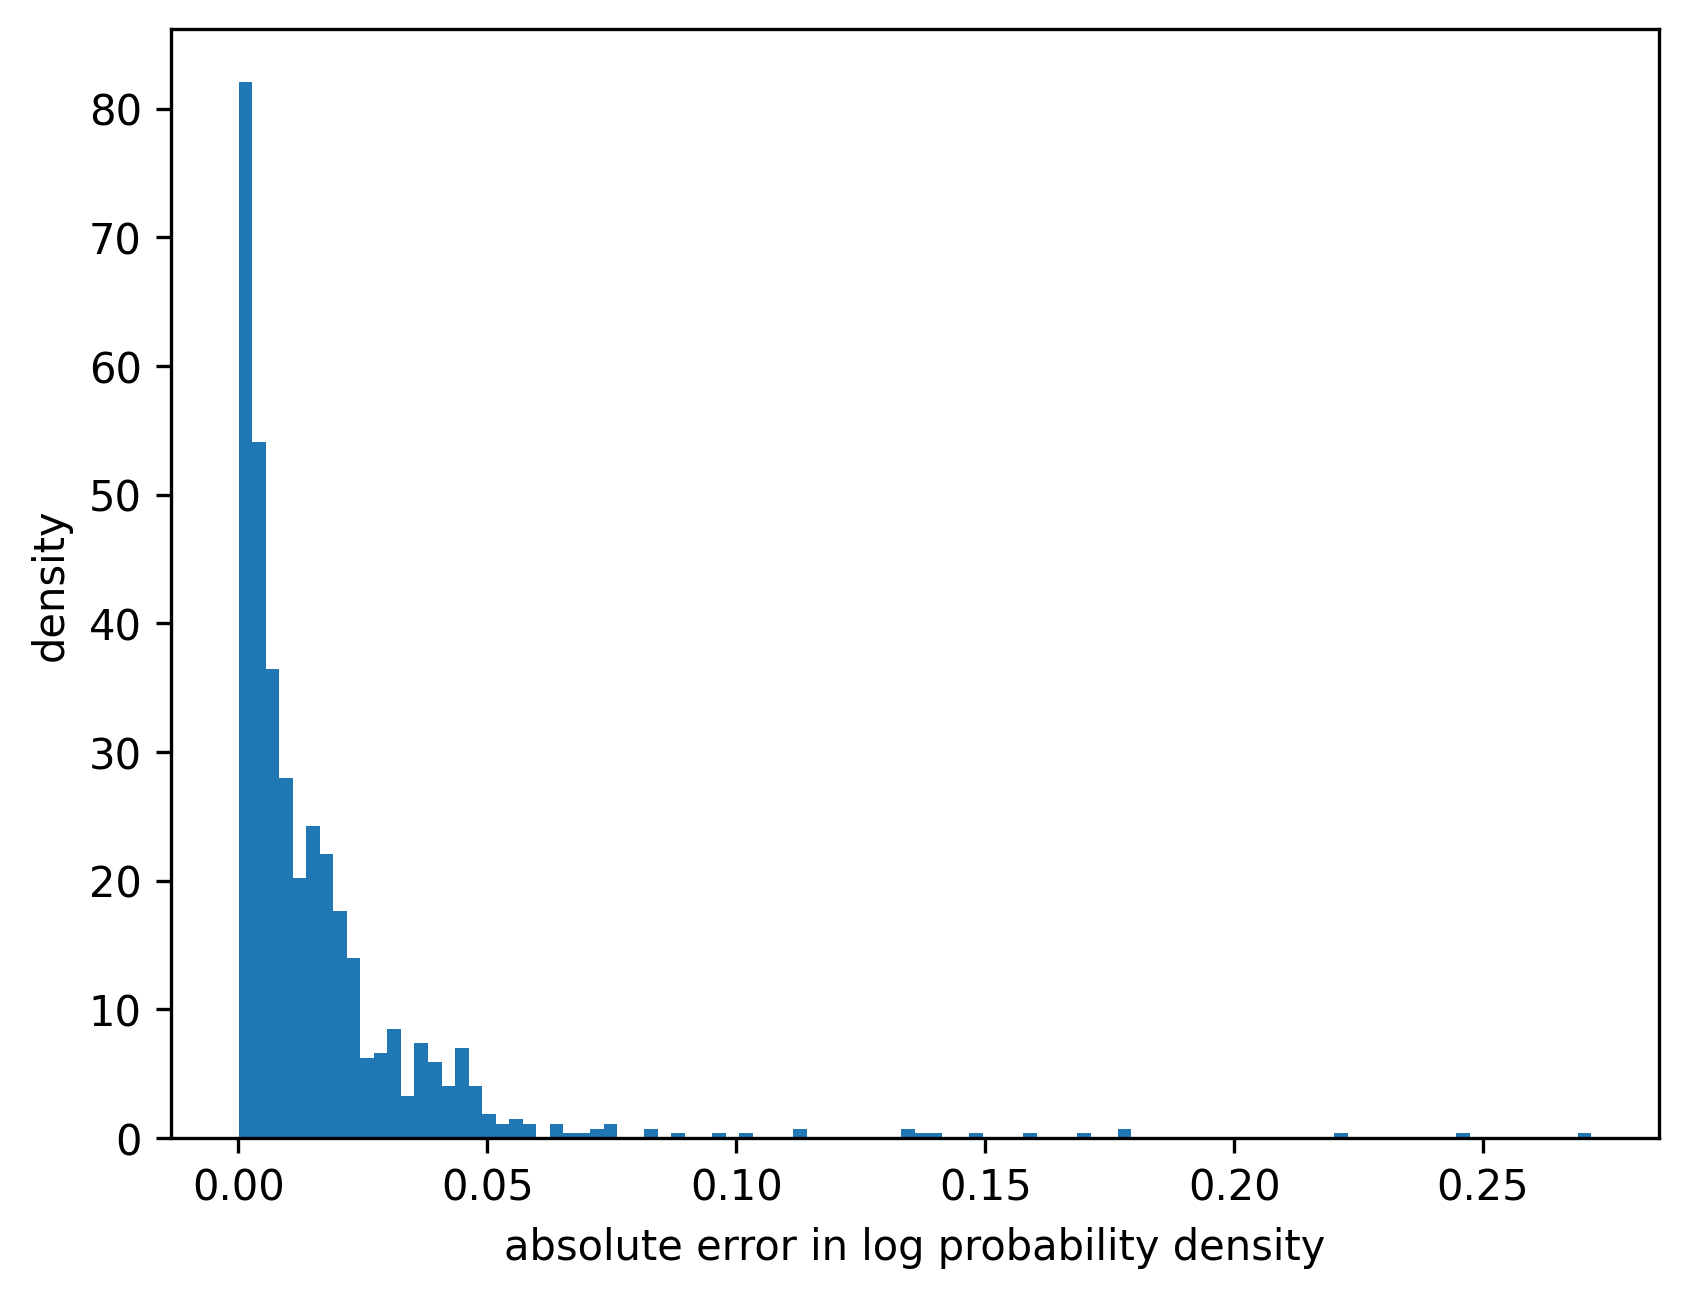

In [5]:
# Make a histogram quantifying the distribution of error
plt.figure(dpi=150)
plt.hist(np.abs(logpdf_truth - logpdf_maf), bins=100, density=True)
plt.xlabel("absolute error in log probability density")
plt.ylabel("density")

### Generating new samples

In [6]:
# Generate new samples from the exact distribution
xgen_exact = gaussian_dist.rvs(size=10000)
# Generate new samples from the DensityEstimate object
xgen_maf = de.sample(10000)

Removed no burn in
Removed no burn in


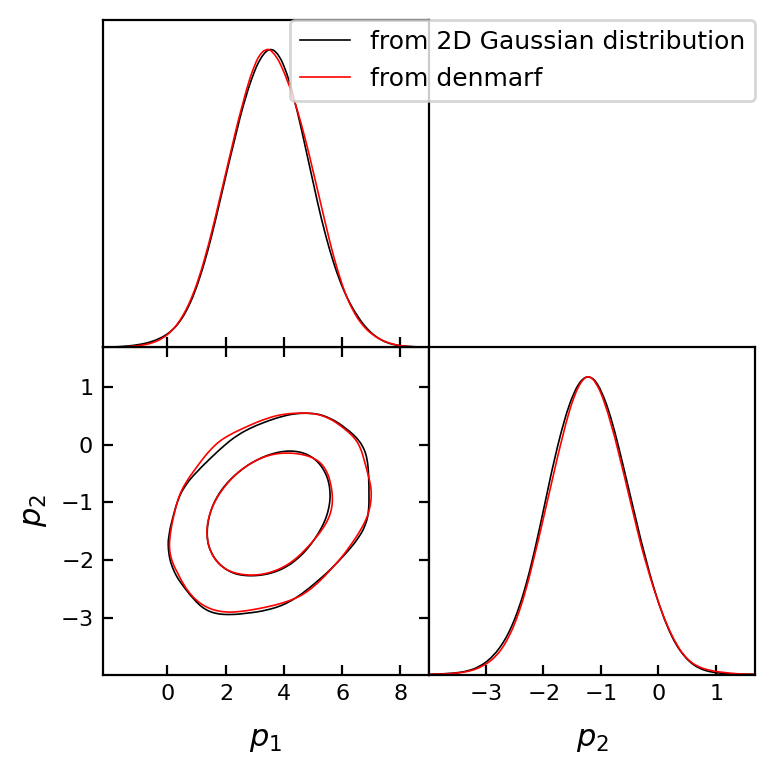

In [7]:
samples_exact = MCSamples(samples=xgen_exact, label="from 2D Gaussian distribution")
samples_maf = MCSamples(samples=xgen_maf, label="from denmarf")

g1 = plots.get_subplot_plotter()
g1.triangle_plot([samples_exact, samples_maf], filled=False)